In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

import sklearn as sk
import sklearn.svm
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.pipeline
import sklearn.ensemble

In [25]:
test_raw = pd.read_csv("test.csv")
test = test_raw.copy()

train_raw = pd.read_csv("train.csv")
train = train_raw.copy()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
for col in train.columns:
    print("{}: {}".format(col, pd.unique(train[col])))


Id: [   1    2    3 ..., 1458 1459 1460]
MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage: [  65.   80.   68.   60.   84.   85.   75.   nan   51.   50.   70.   91.
   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.  115.
   61.   48.   33.   52.  100.   24.   89.   63.   76.   81.   95.   69.
   21.   32.   78.  121.  122.   40.  105.   73.   77.   64.   94.   34.
   90.   55.   88.   82.   71.  120.  107.   92.  134.   62.   86.  141.
   97.   54.   41.   79.  174.   99.   67.   83.   43.  103.   93.   30.
  129.  140.   35.   37.  118.   87.  116.  150.  111.   49.   96.   59.
   36.   56.  102.   58.   38.  109.  130.   53.  137.   45.  106.  104.
   42.   39.  144.  114.  128.  149.  313.  168.  182.  138.  160.  152.
  124.  153.   46.]
LotArea: [ 8450  9600 11250 ..., 17217 13175  9717]
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: [

## Preprocessing

In [5]:
train.columns = train.columns.str.strip()

train = train.drop('Id', axis=1)

stringCols = []
for col in train.columns:
    if train[col].dtype == 'O':
        stringCols.append(col)
    
for col in stringCols:
    train[col] = train[col].fillna('None')

    
numCols = []
for col in train.columns:
    if train[col].dtype == 'int64' or train[col].dtype == 'float64' :
        numCols.append(col)

for col in numCols:
    median = np.nanmedian(train[col])
    train[col] = train[col].fillna(median)

In [6]:
#encoder = sk.preprocessing.LabelEncoder()
#for col in stringCols:
#    train[col] = encoder.fit_transform(train[col])

#encoder = sk.preprocessing.LabelBinarizer()
for col in stringCols:
    dummies = pd.get_dummies(pd.Series(train[col]), prefix=col)
    #newDF = pd.merge(train, pd.DataFrame(dummies))
    train = train.join(dummies)
    train = train.drop(col, axis=1)


# Feature Engineering

In [7]:
train['Eng_PorchSQFT'] = pd.Series(np.zeros(1460))
for col in ['WoodDeckSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'OpenPorchSF']:
    train['Eng_PorchSQFT'] += train[col]
    train = train.drop(col, axis=1)
    numCols.remove(col)

In [8]:
train['Eng_PorchSQFT']

0        61.0
1       298.0
2        42.0
3       307.0
4       276.0
5       390.0
6       312.0
7       667.0
8       295.0
9         4.0
10        0.0
11      168.0
12      316.0
13      193.0
14      389.0
15      160.0
16        0.0
17        0.0
18      102.0
19        0.0
20      394.0
21      205.0
22      330.0
23      210.0
24      496.0
25       56.0
26      254.0
27       50.0
28      546.0
29      136.0
        ...  
1430    140.0
1431     60.0
1432      0.0
1433      0.0
1434    336.0
1435     36.0
1436      0.0
1437    370.0
1438    316.0
1439    304.0
1440    431.0
1441    149.0
1442    220.0
1443    138.0
1444    252.0
1445    252.0
1446    300.0
1447     65.0
1448    192.0
1449      0.0
1450     77.0
1451     36.0
1452     28.0
1453     92.0
1454    113.0
1455     40.0
1456    349.0
1457     60.0
1458    478.0
1459    804.0
Name: Eng_PorchSQFT, Length: 1460, dtype: float64

# Exploration 

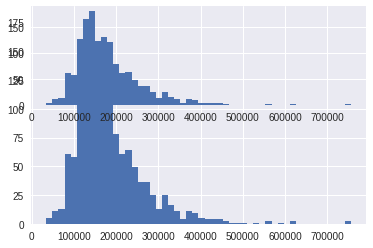

In [9]:
%matplotlib inline

fig = plt.figure()
axes1 = fig.add_subplot(111)
axes1 = plt.hist(train["SalePrice"],50)
axes2 = fig.add_subplot(211)
axes2 = plt.hist(train["SalePrice"],50)


plt.show()

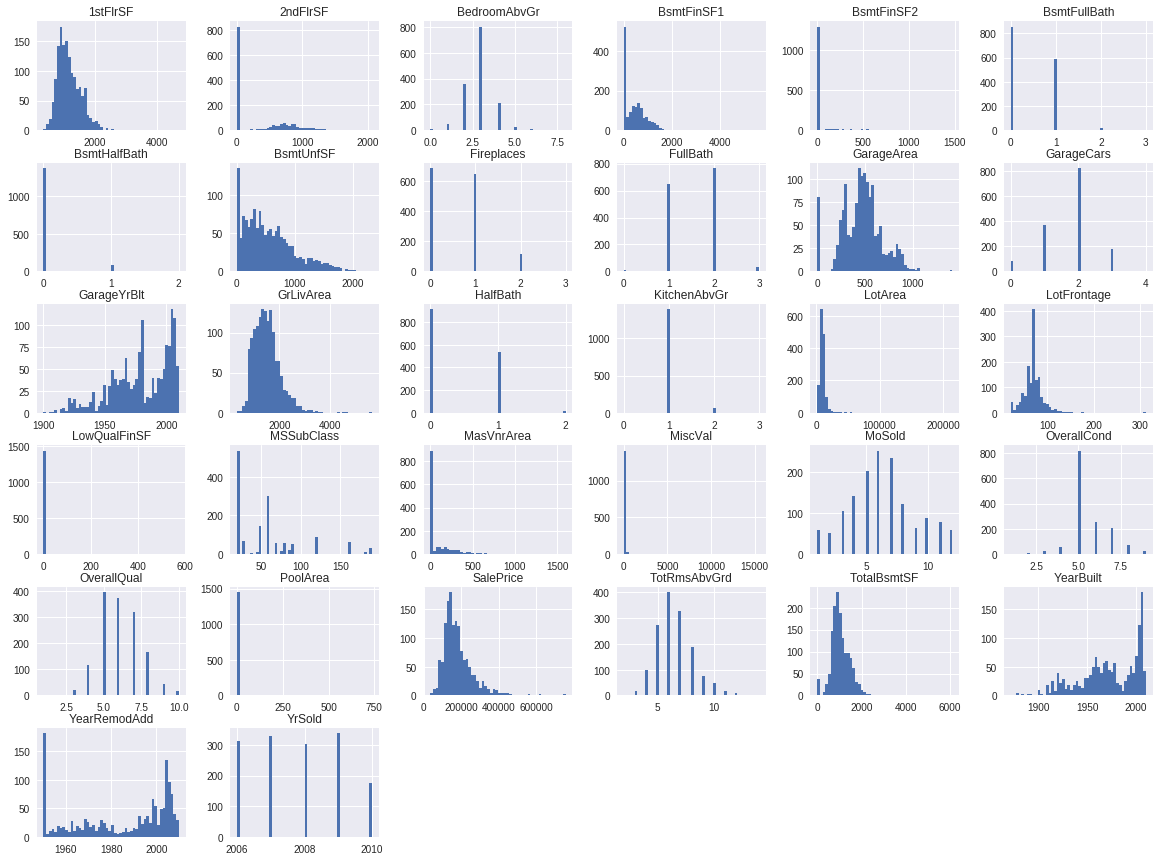

In [10]:
train.hist(column=numCols, bins=50, figsize=(20, 15))
plt.show()

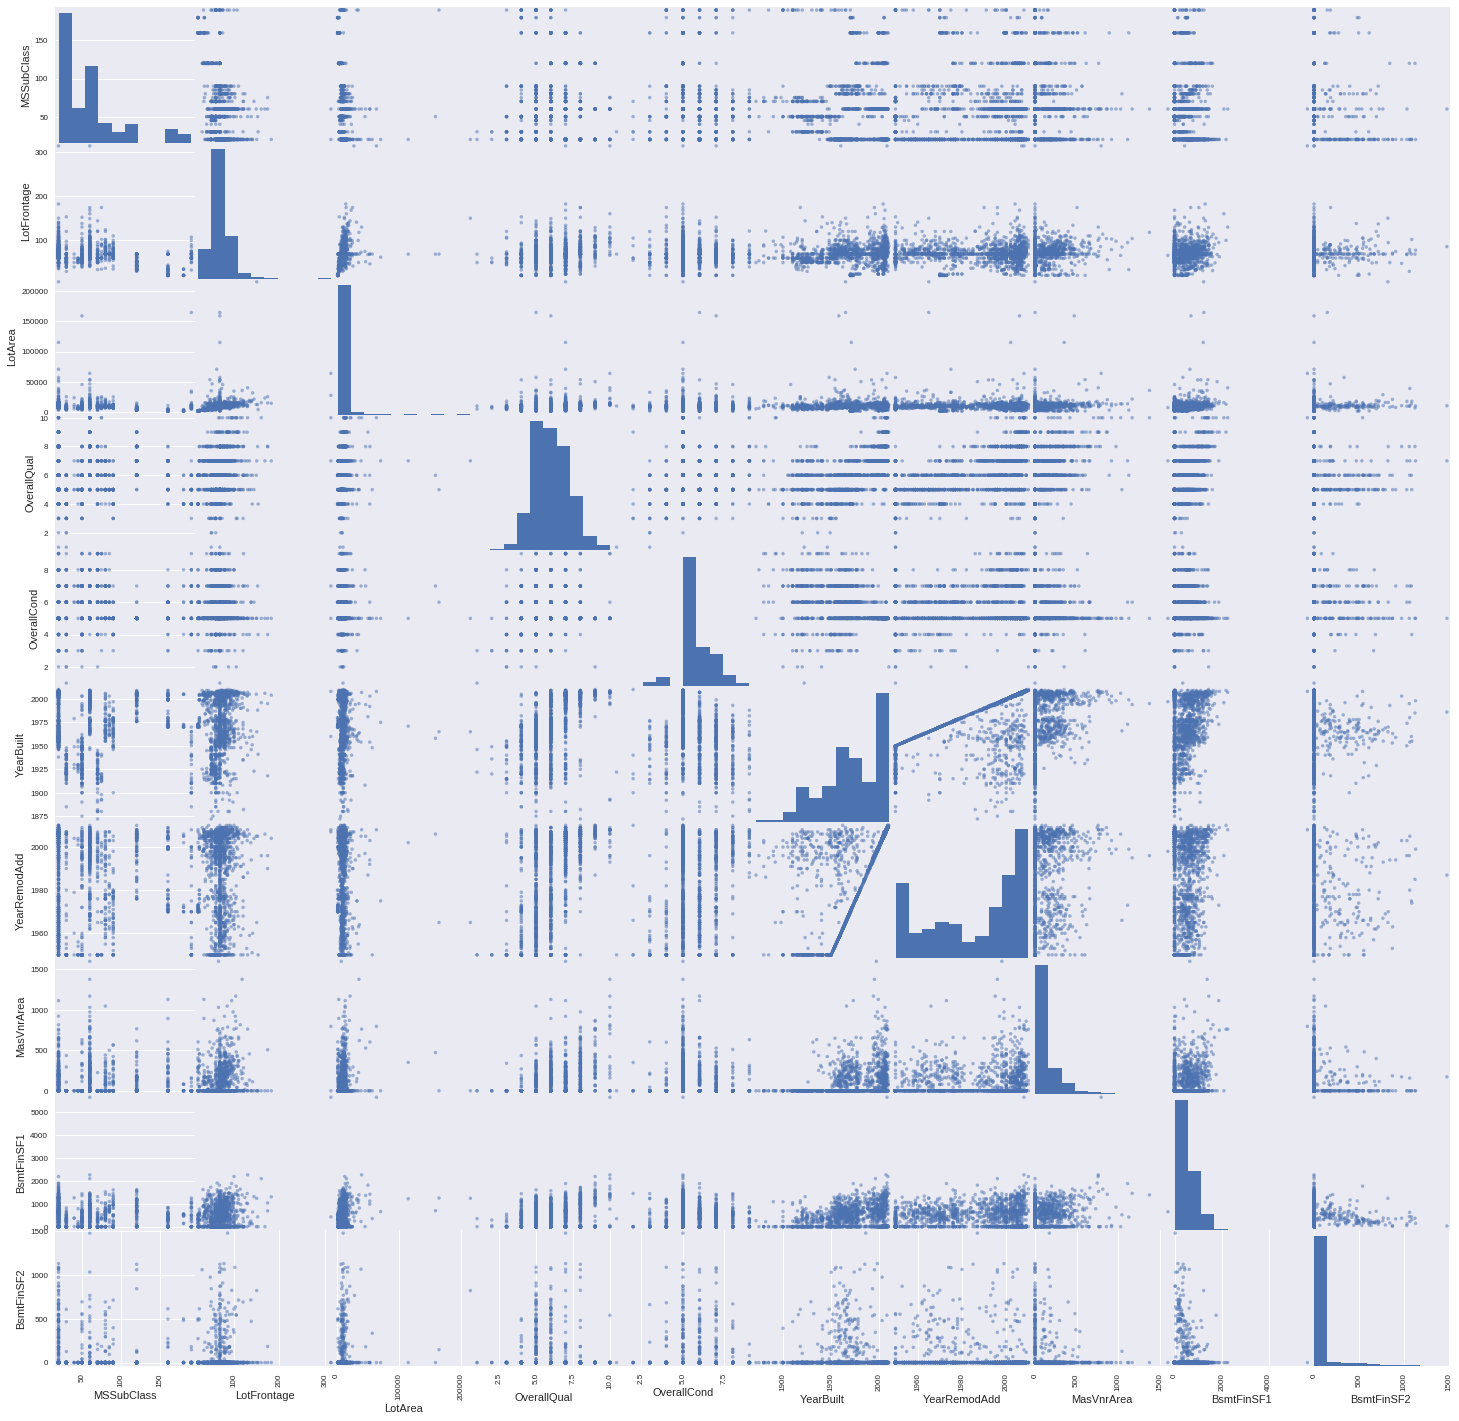

In [11]:
from pandas.plotting import scatter_matrix

attributes = numCols[:10]
scatter_matrix(train[attributes], figsize=(25, 25))
plt.show()

In [12]:
correlationMatrix = train.corr()

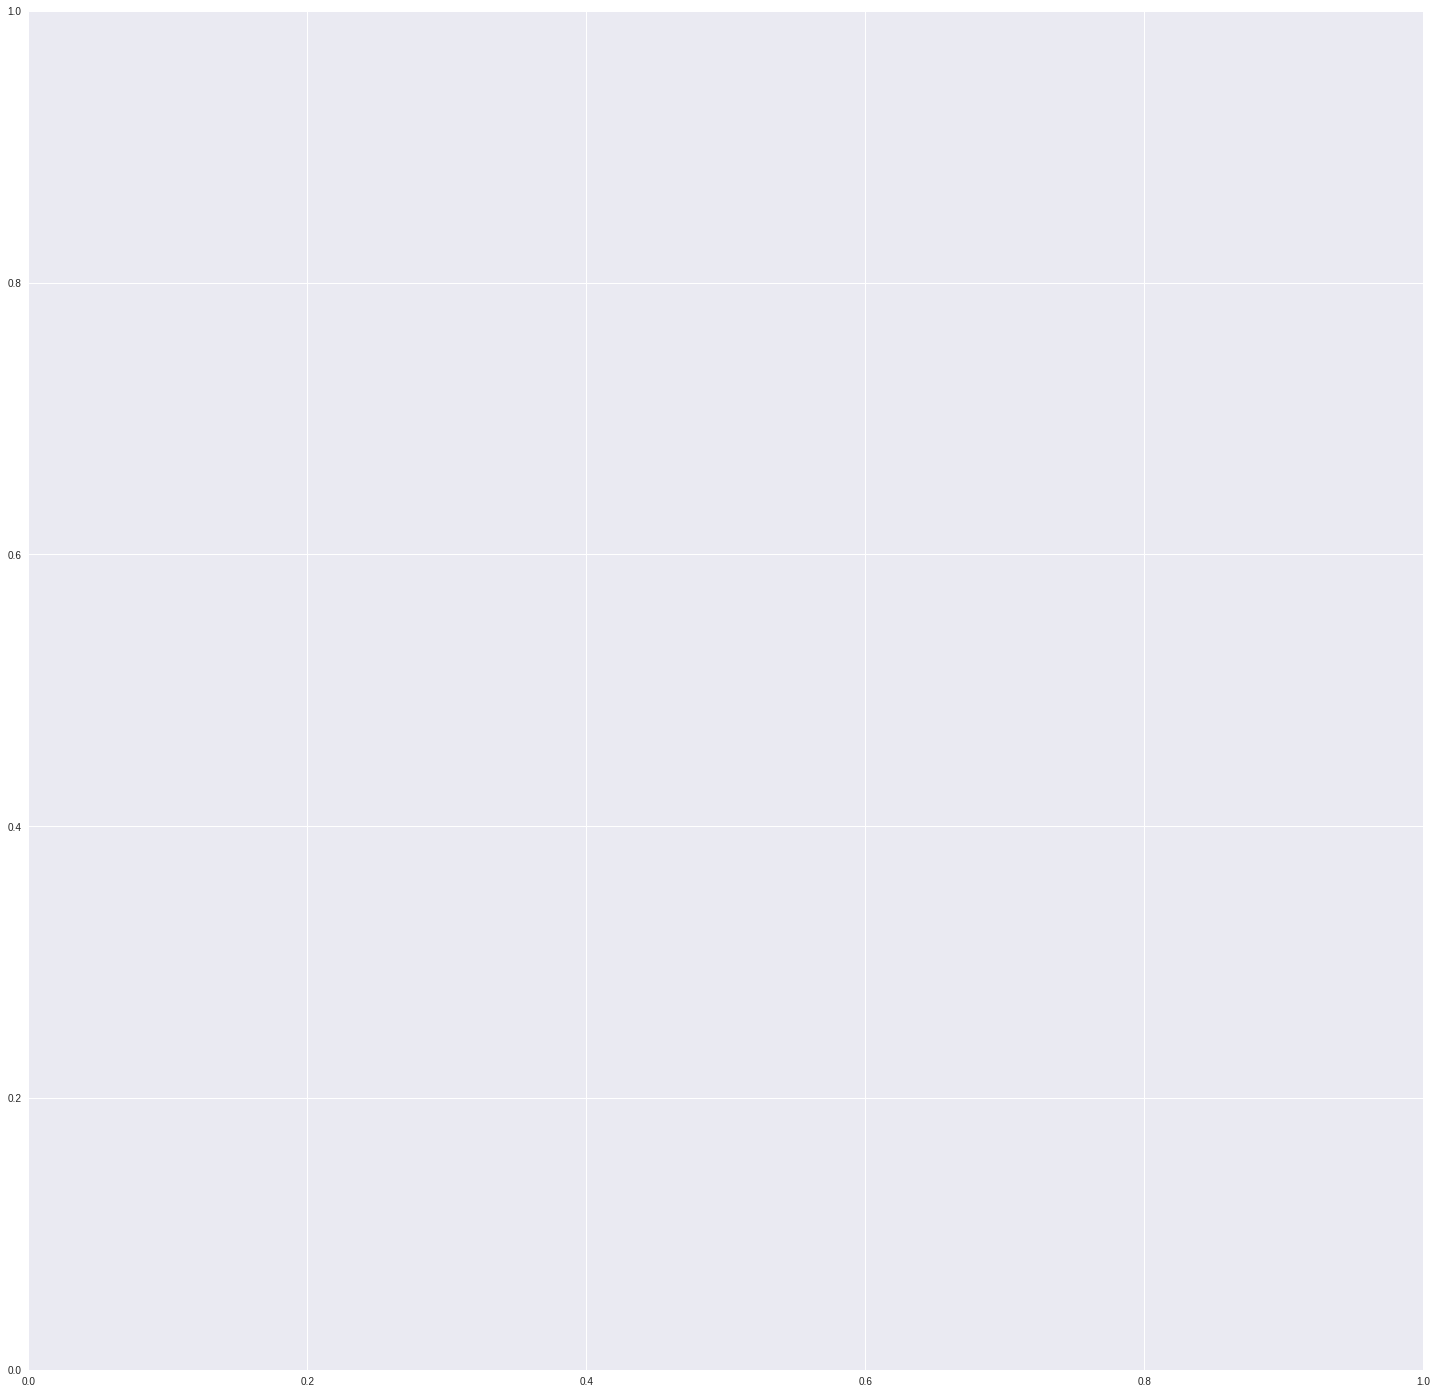

In [13]:
fig, ax = plt.subplots(figsize=(25,25))
#ax = sea.heatmap(correlationMatrix, ax=ax)


# Model Selection

In [14]:
x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

#scaler = sk.preprocessing.StandardScaler().fit(x_train)
#x_train = scaler.transform(x_train)


x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_train, y_train,test_size=0.9) #Create train and test sets
x_train, x_val, y_train, y_val = sk.model_selection.train_test_split(x_train, y_train, test_size=0.8) #Create validation set from training set

### SVR

In [15]:
svmReg = sk.svm.SVR(kernel='rbf', degree=3, gamma='auto', 
           coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, 
           shrinking=True, cache_size=200, verbose=False, max_iter=-1)



In [16]:
pipe = sk.pipeline.Pipeline((
        ('Scaler', sk.preprocessing.StandardScaler()),
        ('SVR', svmReg)
    ))

pipe.fit(x_train, y_train)

Pipeline(steps=(('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))))

In [17]:
y_val_pred = pipe.predict(x_val)

sk.metrics.mean_squared_error(y_val, y_val_pred)

8247250871.1477671

In [18]:
pipe.score(x_train, y_train)

-0.02401353715922605

In [19]:
y_train_pred = pipe.predict(x_train)
sk.metrics.r2_score(y_train, y_train_pred)

-0.02401353715922605

In [20]:
scores = sk.model_selection.cross_val_score(pipe, x_train, y_train, cv=5)
scores.mean()

-0.48751115728783978

### Random Forest Regression

In [21]:
rfReg = sk.ensemble.RandomForestRegressor()

In [22]:
pipe = sk.pipeline.Pipeline((
        ('Scaler', sk.preprocessing.StandardScaler()),
        ('RandomForest', rfReg)
    ))

pipe.fit(x_train, y_train)

Pipeline(steps=(('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))

In [23]:
y_train_pred = pipe.predict(x_train)
sk.metrics.r2_score(y_train, y_train_pred)

0.93757248152898154

In [24]:
scores = sk.model_selection.cross_val_score(pipe, x_train, y_train, cv=5)
scores.mean()

0.011111585103861588